In [2]:
# Activate your environment
import Pkg
Pkg.activate("KellyEnv")

  Activating project at `c:\Users\Zahnbuerste_HQ\Documents\AA_Studium\Master\05_Masterarbeit\Playground\VS_refactor\KellyEnv`


In [3]:
using UnfoldSim
using Unfold
using StableRNGs
using SequentialSamplingModels
using CairoMakie, UnfoldMakie
using SequentialSamplingModels

# Plotting the DDM drift example

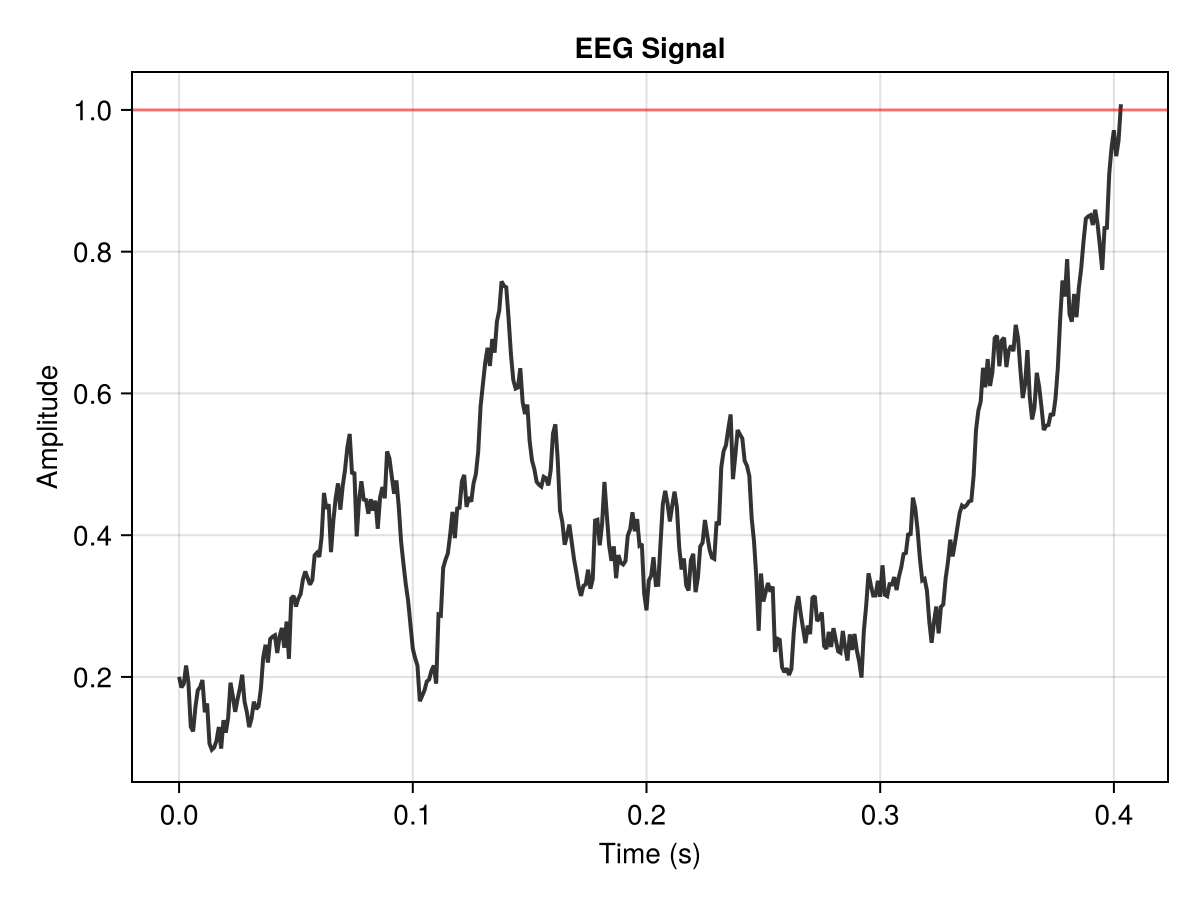

CairoMakie.Screen{IMAGE}


In [7]:
v = 2 # Drift Rate
a = 1 # The amount of information that is considered for a decision.
t = 0.5 # The duration for a non-decisional processes (encoding and response execution). 0.1 - 0.5
z = 0.2 # An indicator of an an initial bias towards a decision. 0 - 1
dist_ddm = DDM(v, a, z, t)
timesteps, evidence = SequentialSamplingModels.simulate(StableRNG(1),dist_ddm)
# Create figure and axis
fig = Figure()
ax = Axis(fig[1, 1], xlabel="Time (s)", ylabel="Amplitude", title="EEG Signal")
series!(ax, timesteps, evidence', solid_color=RGBAf(0, 0, 0, 0.8))  # Ensure alpha value is between 0-1
hlines!(ax, [1.0], color = (:red, 0.5))
# Display the plot
display(fig)

# Plotting the Kelly Model Sample
Is adapted in powerpoint to add some annotations.

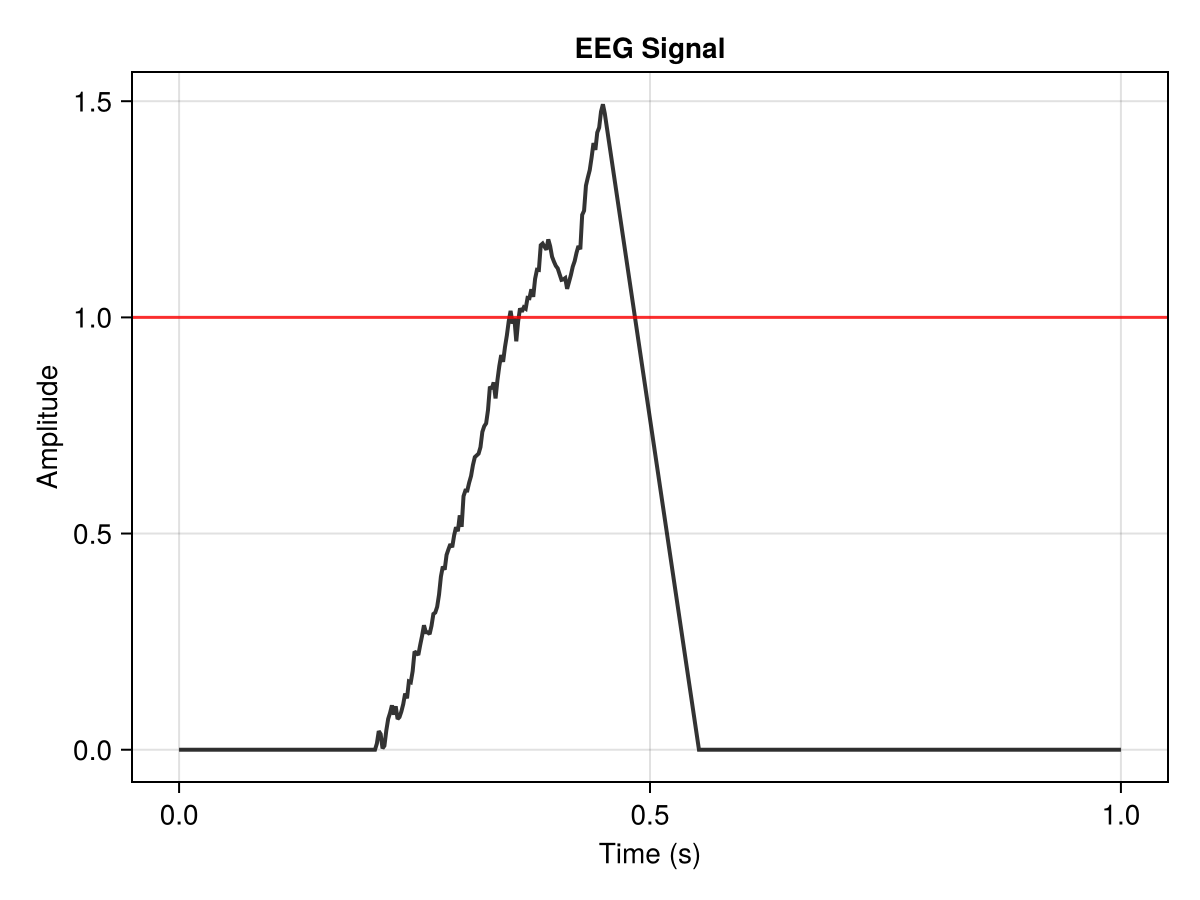

CairoMakie.Screen{IMAGE}


In [39]:
model = KellyModel(
    boundary=1.0,
    post_accumulation_duration=0.1,
    post_accumulation_duration_variability=0,
    ramp_down_duration=0.1,
    )
fs = 500
Δt = 1/fs; # time step
tEnd = 1.0 # trial Duration
time_vec = 0:Δt:tEnd;
rt, evidence = UnfoldSim.KellyModel_simulate_cpp(StableRNG(1), model, time_vec, Δt)
# Create figure and axis
fig = Figure()
ax = Axis(fig[1, 1], xlabel="Time (s)", ylabel="Amplitude", title="EEG Signal")
series!(ax, time_vec, evidence', solid_color=RGBAf(0, 0, 0, 0.8))  # Ensure alpha value is between 0-1
hlines!(ax, [1.0], color = (:red, 0.8))
# Display the plot
display(fig)

# Figure to show the onset progress of an Sequence Design with a Drift Onset combine with Uniform Onset

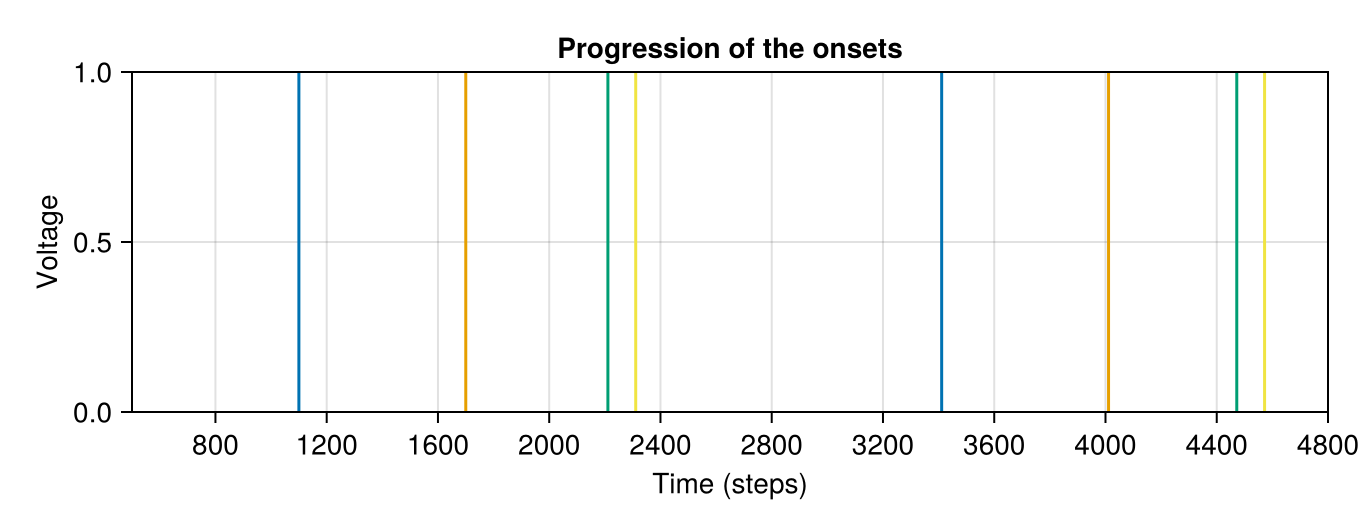

CairoMakie.Screen{IMAGE}


In [31]:
inch = 96
cm = inch / 2.54
fig = Figure(size = (18cm, 7cm))
ax = Axis(fig[1, 1], xlabel="Time (steps)", ylabel="Voltage", title="Progression of the onsets" )
#ax.yticks = 0:0.2:0.6
ax.xticks = 0:400:4800
CairoMakie.ylims!(0, 1)
CairoMakie.xlims!(500, 4800)

vlines!([1100], color = (Makie.wong_colors()[1], 1.0))
vlines!([1700], color = (Makie.wong_colors()[2], 1.0))
vlines!([2211], color = (Makie.wong_colors()[3], 1.0))
vlines!([2311], color = (Makie.wong_colors()[7], 1.0))
vlines!([3411], color = (Makie.wong_colors()[1], 1.0))
vlines!([4011], color = (Makie.wong_colors()[2], 1.0))
vlines!([4472], color = (Makie.wong_colors()[3], 1.0))
vlines!([4572], color = (Makie.wong_colors()[7], 1.0))
#current_figure()
# Display the plot
display(fig)